In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_jobs_salary_all.csv')
df

,job_title_short,job_posted_date,job_location,job_via,job_schedule_type,job_country,search_location,salary_year_avg
0,Senior Data Scientist,4/24/2023 9:51,"Bennington, NE",via ZipRecruiter,Full-time,Sudan,Sudan,128050.0
1,Data Engineer,3/13/2023 12:51,"Mesa, AZ",via Indeed,Full-time,United States,Georgia,140000.0
2,Senior Data Analyst,7/5/2023 7:03,"Alexandria, VA",via ZipRecruiter,Full-time,United States,"New York, United States",156000.0
3,Machine Learning Engineer,4/13/2023 16:05,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,United States,"Illinois, United States",140000.0
4,Data Scientist,10/15/2023 6:02,"Irving, TX",via Snagajob,Full-time and Part-time,United States,"Texas, United States",NaN
...,...,...,...,...,...,...,...,...
9911,Senior Data Engineer,1/19/2023 21:26,Anywhere,via Built In NYC,Full-time,United States,"California, United States",170000.0
9912,Data Engineer,3/1/2023 23:16,"Arlington, VA",via Ai-Jobs.net,Full-time,United States,"Texas, United States",96773.0
9913,Data Analyst,9/7/2023 0:00,"Muscatine, IA",via Dice,Contractor,United States,"Illinois, United States",NaN
9914,Data Analyst,2/28/2023 14:01,"Albany, NY",via LinkedIn,Full-time,United States,"New York, United States",89833.5


In [3]:
df.duplicated().sum()

3641

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

job_title_short         1
job_posted_date         1
job_location           75
job_via                 7
job_schedule_type      14
job_country             1
search_location         1
salary_year_avg      2191
dtype: int64

In [7]:
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0],inplace=True)

In [8]:
df['salary_year_avg'].fillna(df['salary_year_avg'].mean(),inplace=True)

In [9]:
df.isnull().sum()

job_title_short      0
job_posted_date      0
job_location         0
job_via              0
job_schedule_type    0
job_country          0
search_location      0
salary_year_avg      0
dtype: int64

Text(0.5, 1.0, 'salary_year_avg per job_title_short')

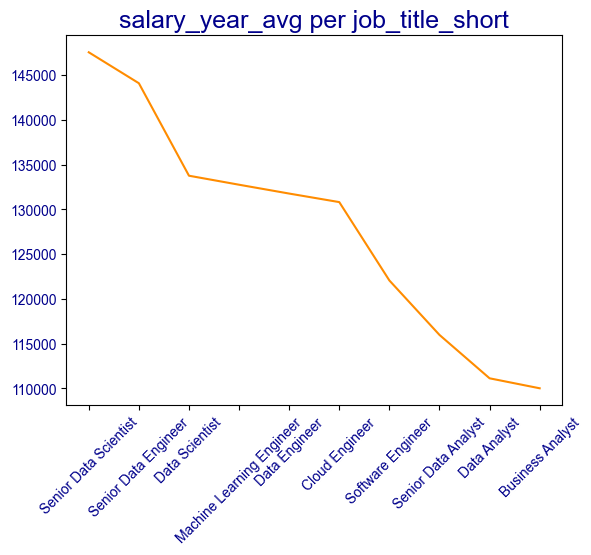

In [10]:
group=df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
plt.xticks(rotation=45,color='darkblue')
plt.yticks(color='darkblue')
sns.lineplot(data=group,color='darkorange')
sns.set_theme(style='whitegrid')
plt.xlabel('')
plt.ylabel('')
plt.title('salary_year_avg per job_title_short',color='darkblue',fontsize=18)

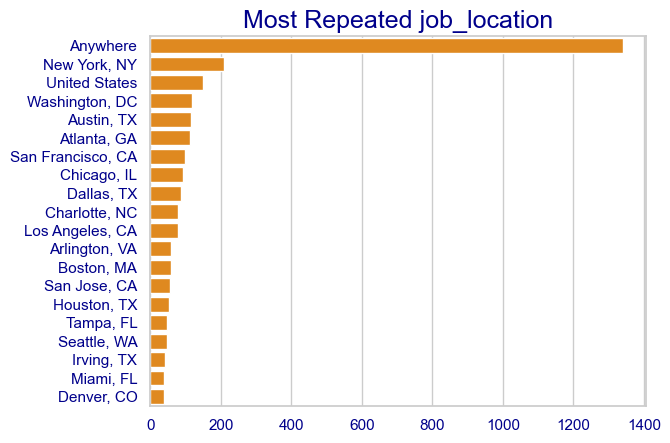

In [11]:
top_jobs = df['job_location'].value_counts().nlargest(20)
sns.barplot(x=top_jobs.values, y=top_jobs.index,color='darkorange')
plt.xticks(color='darkblue')
plt.yticks(color='darkblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Most Repeated job_location',color='darkblue',fontsize=18)
plt.show()

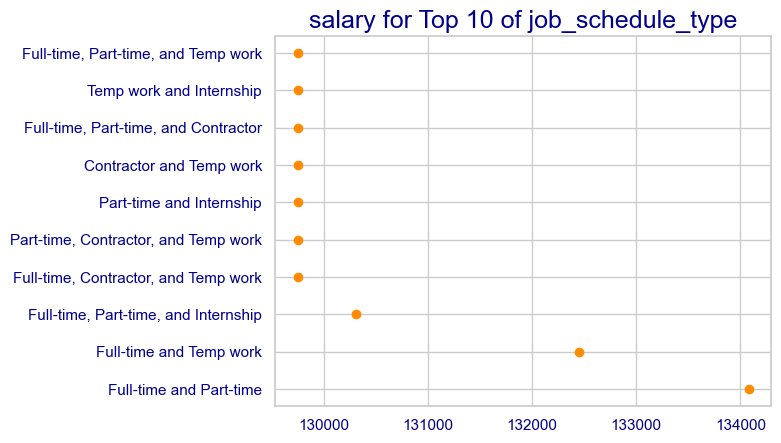

In [12]:
top10_job_schedule_type=df.groupby('job_schedule_type')['salary_year_avg'].mean().sort_values(ascending=False).head(10)
plt.scatter(top10_job_schedule_type.values,top10_job_schedule_type.index,color='darkorange')
plt.xticks(color='darkblue')
plt.yticks(color='darkblue')
plt.grid(True)
plt.title('salary for Top 10 of job_schedule_type',color='darkblue',fontsize=18)
plt.show()

<Axes: title={'center': 'Top 10 job_country'}, xlabel=' ', ylabel=' '>

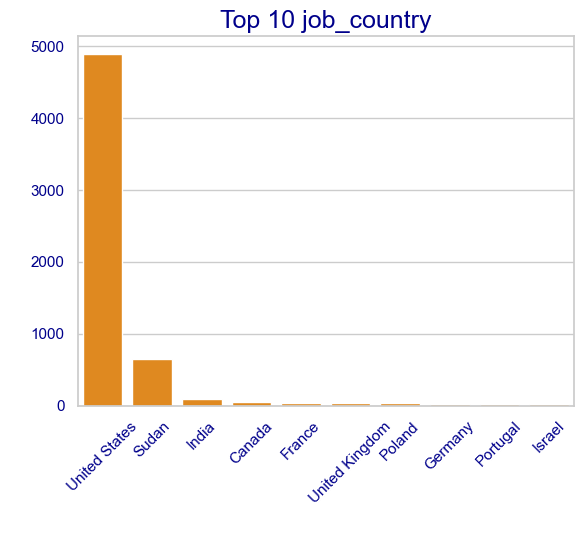

In [13]:
Top10_job_country=df['job_country'].value_counts().head(10)
plt.xticks(rotation=45,color='darkblue')
plt.yticks(color='darkblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Top 10 job_country',color='darkblue',fontsize=18)
sns.set_theme(style='whitegrid')
sns.barplot(Top10_job_country,color='darkorange')


<Axes: title={'center': 'Top 10 job_via'}, xlabel=' ', ylabel=' '>

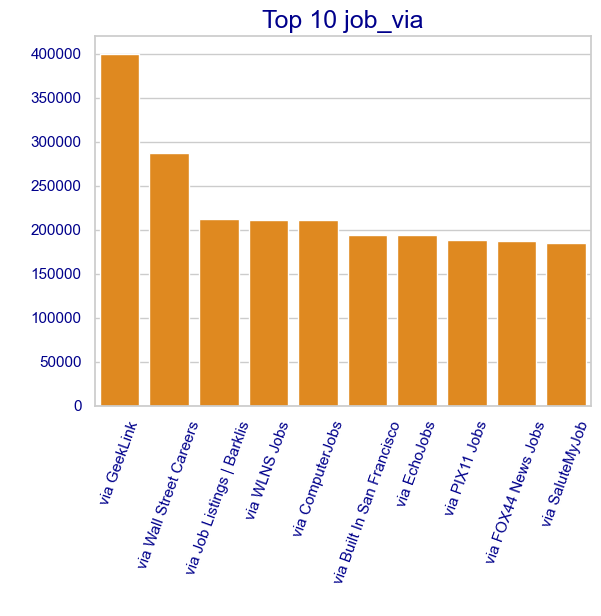

In [14]:
grouped=df.groupby('job_via')['salary_year_avg'].mean().sort_values(ascending=False).head(10)
plt.xticks(rotation=70,color='darkblue')
plt.yticks(color='darkblue')
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Top 10 job_via',fontsize=18,color='darkblue')
sns.set_theme(style='whitegrid')
sns.barplot(grouped,color='darkorange')

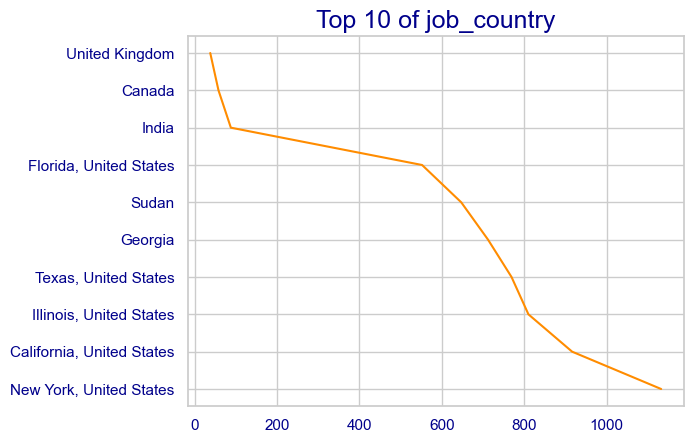

In [20]:
Top10_search_location=df['search_location'].value_counts().sort_values(ascending=False).head(10)
plt.plot(Top10_search_location.values,Top10_search_location.index,color='darkorange')
plt.xticks(color='darkblue')
plt.yticks(color='darkblue')
plt.title('Top 10 of job_country',color='darkblue',fontsize=18)
plt.grid(True)
plt.show()